In [14]:
import geopandas as gpd
import pandas as pd


### Part 1: Clean Neighbourhood-Level Data

In [12]:
# load neighbourhood boundary data
neighbourhoods = gpd.read_file("./Neighbourhoods___4326_geojson.geojson")
neighbourhoods.head()


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry
0,1,2502366,26022881,None,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ..."
1,2,2502365,26022880,None,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.0,"MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ..."
2,3,2502364,26022879,None,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.0,"MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ..."
3,4,2502363,26022878,None,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.0,"MULTIPOLYGON (((-79.4387 43.66766, -79.43841 4..."
4,5,2502362,26022877,None,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.0,"MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ..."


In [19]:
# Ensure type consistency for the area short code
neighbourhoods['AREA_SHORT_CODE'] = neighbourhoods['AREA_SHORT_CODE'].astype(int)

In [16]:
# load neighbourhood profile data

neighbourhood_profiles_2021 = pd.read_excel(r'./neighbourhood_profiles_2021_158_model.xlsx')
neighbourhood_profiles_2021

,Neighbourhood Name,West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Thistletown-Beaumond Heights,Rexdale-Kipling,Elms-Old Rexdale,Kingsview Village-The Westway,Willowridge-Martingrove-Richview,Humber Heights-Westmount,Edenbridge-Humber Valley,...,Harbourfront-CityPlace,St Lawrence-East Bayfront-The Islands,Church-Wellesley,Downtown Yonge East,Bay-Cloverhill,Yonge-Bay Corridor,Junction-Wallace Emerson,Dovercourt Village,North Toronto,South Eglinton-Davisville
0,Neighbourhood Number,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
1,TSNS 2020 Designation,Not an NIA or Emerging Neighbourhood,Neighbourhood Improvement Area,Neighbourhood Improvement Area,Not an NIA or Emerging Neighbourhood,Neighbourhood Improvement Area,Neighbourhood Improvement Area,Not an NIA or Emerging Neighbourhood,Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,...,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood
2,Total - Age groups of the population - 25% sam...,33300,31345,9850,10375,9355,22005,22445,10005,15190,...,28135,31285,22320,17700,16670,12645,23180,12380,15885,22735
3,0 to 14 years,4295,5690,1495,1575,1610,3915,3500,1370,2070,...,2065,2285,895,1055,745,970,3075,1365,1315,2190
4,0 to 4 years,1460,1650,505,505,440,1245,1065,395,520,...,1030,1045,495,480,370,500,1135,445,535,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,Total - Eligibility and instruction in the min...,3875,5540,1325,1370,1520,3460,3140,1275,2100,...,1185,1580,540,720,470,555,2375,1190,1050,1580
2599,Children eligible for instruction in the min...,335,395,120,90,70,240,240,70,225,...,145,200,60,70,80,30,305,130,95,155
2600,Eligible children who have been instructed...,255,245,75,75,60,150,185,45,130,...,70,165,35,55,75,10,190,95,65,105
2601,Eligible children who have not been instru...,75,145,45,25,10,95,55,25,95,...,75,35,25,15,0,20,115,35,30,45


In [21]:
# Transpose the data to have neighbourhood statistics per row, rather than per column.
np2021 = neighbourhood_profiles_2021.transpose()

# make census questions column names
new_headers = np2021.iloc[0]
np2021 = np2021[1:]
np2021.columns = new_headers

In [58]:
# strip leading spaces (indentation was used to denote subquestions, no need for it now)
np2021.columns = np2021.columns.str.strip()

In [ ]:
# Rename columns for consistency and clarity
np2021_rename = {
    'Neighbourhood Number':'AREA_SHORT_CODE',
    'Median age of the population':'Median Age',
    'Median total income in 2020  among recipients ($)':'Median Total Income',
    'Prevalence of low income based on the Low-income cut-offs, after tax (LICO-AT) (%)': 'Percent Deemed Low-Income',
    'Average size of census families':'Average Family Size', # Possible underreporting due to census age
}



np2021 = np2021.rename(columns = np2021_rename)

In [122]:
np2021['Average Family Size'].loc['North St. James Town']

2.8

In [41]:
# Neighbourhood-level health data
nbhd_figures = pd.read_excel(r'./formatted_figures_by_nbhd.xlsx')
nbhd_figures

,AREA_SHORT_CODE,"Total # of People with Diabetes, age 20+",Total population 2022,Total population 2023,Age-Standardized Diabetes Rate,"Diabetes Rate (95% CI) LL, Total","Diabetes Rate (95% CI) UL, Total",Total Diabetes Prevalence,"Diabetes Prevalence (95% CI) LL, Total","Diabetes Prevalence (95% CI) UL, Total",# People with MHV,Age Standardized MHV Rate,Number of Hospitalizations,Age-Standardized Annual Hospitalization Rate (per 100 people)
0,1,5365,31085,38237,18.0,17.6,18.4,17.3,16.8,17.7,2012,6.6,5232,67.5
1,2,4732,26164,34865,19.2,18.8,19.7,18.1,17.6,18.6,1872,7.3,4553,66.6
2,3,1546,9095,11439,16.5,15.8,17.2,17.0,16.2,17.8,747,8.3,1765,71.8
3,4,1504,9290,11530,14.9,14.2,15.5,16.2,15.4,16.9,757,8.1,1848,71.6
4,5,1298,7897,10304,16.5,15.7,17.3,16.4,15.6,17.3,641,8.1,1468,70.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,170,625,14982,17656,8.5,7.9,9.1,4.2,3.9,4.5,870,6.3,1285,49.9
154,171,2184,21437,25532,12.2,11.8,12.7,10.2,9.8,10.6,2029,9.3,3091,64.0
155,172,1042,11631,13551,10.0,9.5,10.5,9.0,8.4,9.5,1057,9.0,1473,56.1
156,173,964,14910,16875,8.9,8.3,9.4,6.5,6.1,6.9,1289,8.6,1735,60.3


#### Finalize and Merge Data

In [79]:
# Select only relevant columns from neighbourhood geojson
nbhd_cols = ['AREA_SHORT_CODE', 'AREA_NAME', 'geometry']
final_nbhd = neighbourhoods[nbhd_cols]
final_nbhd['AREA_NAME'] = final_nbhd['AREA_NAME'].str.('/', '-')

/Users/robertkurdyak/laundry_flask/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


69    Wexford-Maryvale
Name: AREA_NAME, dtype: object

In [82]:
# Select desired census questions per neighbourhood
np2021_cols = [key for key in np2021_rename.values()] # recently renamed columns

np2021_final = np2021[np2021_cols].rename(columns = np2021_rename).reset_index(drop = True)#.rename(columns = {'Neighbourhood Number':'AREA_SHORT_CODE'})


In [83]:

mapping_data = final_nbhd.merge(np2021_final, how = 'left', on = 'AREA_SHORT_CODE')

In [84]:
final_mapping_data = mapping_data.merge(nbhd_figures, how = 'left', on = 'AREA_SHORT_CODE')

In [99]:
final_mapping_data.columns = final_mapping_data.columns.str.strip()

In [100]:

final_mapping_data['Median Age'] = final_mapping_data['Median Age'].astype(int)
final_mapping_data['Median Total Income'] = final_mapping_data['Median Total Income'].astype(int)
final_mapping_data['Percent Deemed Low-Income'] = final_mapping_data['Percent Deemed Low-Income'].astype(int)
final_mapping_data['Average Family Size'] = final_mapping_data['Average Family Size'].astype(int)


In [101]:
# Break the dataset up into composite parts 
nbhd_geojson_dict = {}
for region in final_mapping_data['AREA_NAME'].unique():
    region_row = final_mapping_data[final_mapping_data['AREA_NAME'] == region]
    region_gdf = gpd.GeoDataFrame(region_row, geometry = 'geometry', crs = final_mapping_data.crs)
    nbhd_geojson_dict[region] = region_gdf

In [107]:
final_mapping_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [109]:
for nbhd, nbhd_gdf in nbhd_geojson_dict.items():
    nbhd_geojson_path = f'./GeoJSON/neighbourhoods/{nbhd}.geojson'
    nbhd_gdf.to_file(nbhd_geojson_path, driver = 'GeoJSON')


In [112]:
nbhd_geojson_dict['North St.James Town']

,AREA_SHORT_CODE,AREA_NAME,geometry,Median Age,Median Total Income,Percent Deemed Low-Income,Average Family Size,"Total # of People with Diabetes, age 20+",Total population 2022,Total population 2023,Age-Standardized Diabetes Rate,"Diabetes Rate (95% CI) LL, Total","Diabetes Rate (95% CI) UL, Total",Total Diabetes Prevalence,"Diabetes Prevalence (95% CI) LL, Total","Diabetes Prevalence (95% CI) UL, Total",# People with MHV,Age Standardized MHV Rate,Number of Hospitalizations,Age-Standardized Annual Hospitalization Rate (per 100 people)
81,74,North St.James Town,"MULTIPOLYGON (((-79.37572 43.66652, -79.37585 ...",36,33600,14,2,2048,17009,20078,15.0,14.4,15.6,12.0,11.6,12.5,1422,8.5,2628,72.8


In [98]:
final_mapping_data.explore(column = 'Median Age')

KeyboardInterrupt: 

In [114]:
from pathlib import Path

geojson_folder = Path('./GeoJSON/neighbourhoods')
geojson_files = list(geojson_folder.glob('*.geojson'))
geojson_files

[PosixPath('GeoJSON/neighbourhoods/South Eglinton-Davisville.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Bridle Path-Sunnybrook-York Mills.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Pelmo Park-Humberlea.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Steeles.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Scarborough Village.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Clairlea-Birchmount.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Forest Hill South.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Thistletown-Beaumond Heights.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Roncesvalles.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Oakdale-Beverley Heights.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Edenbridge-Humber Valley.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Morningside Heights.geojson'),
 PosixPath('GeoJSON/neighbourhoods/St.Andrew-Windfields.geojson'),
 PosixPath('GeoJSON/neighbourhoods/Little Portugal.geojson'),
 PosixPath('GeoJSON/neighbourhoods/East Willowdale.geojson')

In [115]:
geojson_data = {}
for f in geojson_files:
    name = f.stem
    geojson_data[name] = gpd.read_file(f)
    
geojson_data

{'South Eglinton-Davisville':   AREA_SHORT_CODE                  AREA_NAME  Median Age  Median Total Income  \
 0             174  South Eglinton-Davisville          36                52400   
 
    Percent Deemed Low-Income  Average Family Size  \
 0                         10                    2   
 
    Total # of People with Diabetes, age 20+  Total population 2022  \
 0                                      1392                  21412   
 
    Total population 2023  Age-Standardized Diabetes Rate  \
 0                  24605                             7.7   
 
    Diabetes Rate (95% CI) LL, Total  Diabetes Rate (95% CI) UL, Total  \
 0                               7.3                               8.1   
 
    Total Diabetes Prevalence  Diabetes Prevalence (95% CI) LL, Total  \
 0                        6.5                                     6.2   
 
    Diabetes Prevalence (95% CI) UL, Total  # People with MHV  \
 0                                     6.8               1936   

In [116]:
geojson_data['North St.James Town']

,AREA_SHORT_CODE,AREA_NAME,Median Age,Median Total Income,Percent Deemed Low-Income,Average Family Size,"Total # of People with Diabetes, age 20+",Total population 2022,Total population 2023,Age-Standardized Diabetes Rate,"Diabetes Rate (95% CI) LL, Total","Diabetes Rate (95% CI) UL, Total",Total Diabetes Prevalence,"Diabetes Prevalence (95% CI) LL, Total","Diabetes Prevalence (95% CI) UL, Total",# People with MHV,Age Standardized MHV Rate,Number of Hospitalizations,Age-Standardized Annual Hospitalization Rate (per 100 people),geometry
0,74,North St.James Town,36,33600,14,2,2048,17009,20078,15.0,14.4,15.6,12.0,11.6,12.5,1422,8.5,2628,72.8,"MULTIPOLYGON (((-79.37572 43.66652, -79.37585 ..."


<Axes: >

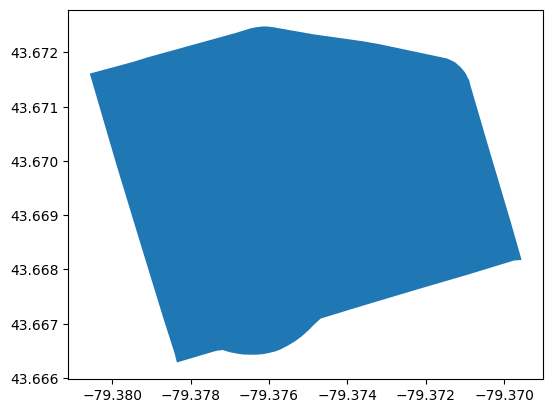

In [118]:
geojson_data['North St.James Town'].plot()